In [1]:
import pandas as pd
from tqdm.notebook import tqdm

# Preprocessing

In [2]:
# btc_data_path = "../md/btcusdt:Binance:LinearPerpetual"
btc_data_path = '../md_new/ethusdt/'

btc_lobs_df = pd.read_csv(btc_data_path + '/lobs.csv')
btc_trades_df = pd.read_csv(btc_data_path + '/trades.csv')

# btc_columns_mapper = {i: i.replace('btcusdt:Binance:LinearPerpetual_', '').strip() for i in btc_lobs_df.columns}
btc_columns_mapper = {i: i.replace('ethusdt:Binance:Spot_', '').strip() for i in btc_lobs_df.columns}

btc_lobs_df.rename(columns=btc_columns_mapper, inplace=True)

btc_lobs_df['receive_ts'] = pd.to_datetime(btc_lobs_df['receive_ts'])
btc_lobs_df['exchange_ts'] = pd.to_datetime(btc_lobs_df['exchange_ts'])
btc_trades_df['receive_ts'] = pd.to_datetime(btc_trades_df['receive_ts'])
btc_trades_df['exchange_ts'] = pd.to_datetime(btc_trades_df['exchange_ts'])

btc_lobs_df.sort_values(by=['exchange_ts'], inplace=True)
btc_trades_df.sort_values(by=['exchange_ts'], inplace=True)

In [5]:
btc_lobs_df

,receive_ts,exchange_ts,ask_price_0,ask_vol_0,bid_price_0,bid_vol_0,ask_price_1,ask_vol_1,bid_price_1,bid_vol_1,...,bid_price_7,bid_vol_7,ask_price_8,ask_vol_8,bid_price_8,bid_vol_8,ask_price_9,ask_vol_9,bid_price_9,bid_vol_9
0,2023-01-20 14:30:55.951527936,2023-01-20 14:30:55.948,1555.36,48.4843,1555.35,4.6586,1555.41,3.1175,1555.19,0.5199,...,1554.15,0.0388,1555.64,3.7312,1553.99,0.4554,1555.71,3.6166,1553.97,0.4649
1,2023-01-20 14:30:56.051527936,2023-01-20 14:30:56.048,1555.36,45.7612,1555.35,4.6586,1555.41,3.1175,1555.17,5.5000,...,1554.92,3.9575,1555.58,6.4559,1554.78,16.0084,1555.64,3.7312,1554.68,0.2000
2,2023-01-20 14:30:56.151527936,2023-01-20 14:30:56.148,1555.36,50.0490,1555.35,4.6251,1555.41,3.1175,1555.25,0.0150,...,1554.96,3.2149,1555.57,1.9288,1554.93,1.5835,1555.58,6.4559,1554.92,3.9575
3,2023-01-20 14:30:56.251527936,2023-01-20 14:30:56.248,1555.36,49.7490,1555.35,4.6251,1555.41,3.1175,1555.25,0.0150,...,1554.93,1.5835,1555.58,6.4559,1554.92,3.9575,1555.60,1.8000,1554.90,7.9879
4,2023-01-20 14:30:56.351527936,2023-01-20 14:30:56.348,1555.36,49.8891,1555.35,4.6251,1555.38,0.4101,1555.25,0.0150,...,1554.93,1.5835,1555.57,1.9847,1554.92,3.9575,1555.58,6.4559,1554.90,7.9879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178005,2023-01-23 08:16:09.796527872,2023-01-23 08:16:09.793,1637.73,9.6469,1637.72,41.1297,1637.74,1.9432,1637.71,11.9122,...,1637.58,0.0443,1637.85,0.0558,1637.57,14.8326,1637.86,0.0076,1637.52,0.7740
2178006,2023-01-23 08:16:09.896527872,2023-01-23 08:16:09.893,1637.73,9.6469,1637.72,38.2585,1637.74,1.6087,1637.71,11.9122,...,1637.58,0.0443,1637.85,0.0558,1637.57,14.8326,1637.86,0.0076,1637.52,0.7740
2178007,2023-01-23 08:16:09.996527872,2023-01-23 08:16:09.993,1637.73,9.6469,1637.72,38.2585,1637.74,1.6087,1637.71,11.9122,...,1637.58,0.0443,1637.85,0.0558,1637.57,14.8326,1637.86,0.0076,1637.52,0.7740
2178008,2023-01-23 08:16:10.096527872,2023-01-23 08:16:10.093,1637.73,9.6469,1637.72,38.2585,1637.74,1.6087,1637.71,11.9122,...,1637.58,0.0443,1637.85,0.0558,1637.57,14.8326,1637.86,0.0076,1637.52,0.7740


<AxesSubplot:xlabel='receive_ts'>

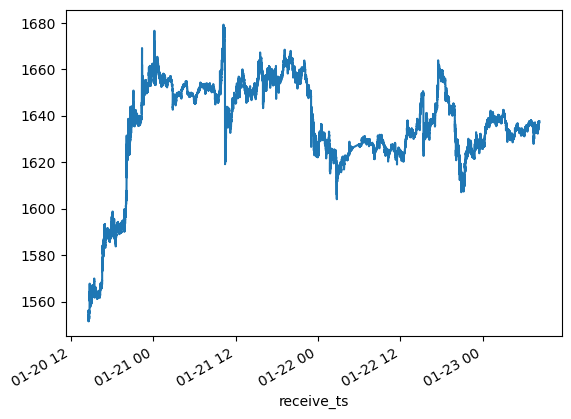

In [4]:
btc_lobs_df.set_index('receive_ts')['ask_price_0'].plot()

In [6]:
btc_lobs_df

,receive_ts,exchange_ts,ask_price_0,ask_vol_0,bid_price_0,bid_vol_0,ask_price_1,ask_vol_1,bid_price_1,bid_vol_1,...,bid_price_7,bid_vol_7,ask_price_8,ask_vol_8,bid_price_8,bid_vol_8,ask_price_9,ask_vol_9,bid_price_9,bid_vol_9
0,2023-01-02 12:06:25.528672512,2023-01-02 12:06:25.526000128,1217.25,22.7736,1217.24,115.4754,1217.31,9.7092,1217.16,13.2258,...,1215.05,4.1151,1219.94,0.0481,1214.48,46.0800,1221.17,20.0083,1156.38,0.0095
1,2023-01-02 12:06:25.629007360,2023-01-02 12:06:25.625999872,1217.25,22.7654,1217.24,115.4754,1217.31,9.7092,1217.16,13.2258,...,1215.05,4.1151,1219.94,0.0481,1214.48,46.0800,1221.17,20.0083,1156.38,0.0095
2,2023-01-02 12:06:25.728954112,2023-01-02 12:06:25.726000128,1217.25,22.7654,1217.24,115.4754,1217.31,9.7092,1217.16,13.2258,...,1215.05,4.1151,1219.94,0.0481,1214.48,46.0800,1221.17,20.0083,1156.38,0.0095
3,2023-01-02 12:06:25.928874240,2023-01-02 12:06:25.926000128,1217.25,22.7654,1217.24,115.4754,1217.31,9.2693,1217.16,13.2258,...,1215.05,4.1151,1219.94,0.0481,1214.48,46.0800,1221.17,20.0083,1156.38,0.0095
4,2023-01-02 12:06:26.028703488,2023-01-02 12:06:26.025999872,1217.25,22.6127,1217.24,115.4754,1217.31,9.7511,1217.16,13.2258,...,1215.05,4.1151,1219.94,0.0481,1214.48,46.0800,1221.17,20.0083,1156.38,0.0095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278461,2023-01-04 06:59:59.547537664,2023-01-04 06:59:59.544000000,1250.51,4.7109,1250.50,136.1618,1250.53,0.0100,1250.49,2.0782,...,1250.40,0.6389,1250.66,0.4800,1250.39,16.2431,1250.67,25.3278,1250.38,17.5755
1278462,2023-01-04 06:59:59.647053568,2023-01-04 06:59:59.644000000,1250.51,4.7109,1250.50,136.1618,1250.53,0.0100,1250.49,2.0782,...,1250.40,0.6389,1250.64,11.3516,1250.39,16.2431,1250.66,0.4800,1250.38,17.5755
1278463,2023-01-04 06:59:59.746959872,2023-01-04 06:59:59.744000000,1250.51,22.4218,1250.50,136.1618,1250.53,0.0100,1250.49,2.0782,...,1250.40,0.6389,1250.66,0.4800,1250.39,16.2431,1250.67,25.3278,1250.38,17.5755
1278464,2023-01-04 06:59:59.847165184,2023-01-04 06:59:59.844000000,1250.51,22.4218,1250.50,136.1618,1250.53,0.0100,1250.49,2.0782,...,1250.40,0.6389,1250.64,27.9952,1250.39,16.2431,1250.66,0.4800,1250.38,17.5755


In [7]:
btc_lobs_df.head(2)

,receive_ts,exchange_ts,ask_price_0,ask_vol_0,bid_price_0,bid_vol_0,ask_price_1,ask_vol_1,bid_price_1,bid_vol_1,...,bid_price_7,bid_vol_7,ask_price_8,ask_vol_8,bid_price_8,bid_vol_8,ask_price_9,ask_vol_9,bid_price_9,bid_vol_9
0,2023-01-02 12:06:25.528672512,2023-01-02 12:06:25.526000128,1217.25,22.7736,1217.24,115.4754,1217.31,9.7092,1217.16,13.2258,...,1215.05,4.1151,1219.94,0.0481,1214.48,46.08,1221.17,20.0083,1156.38,0.0095
1,2023-01-02 12:06:25.629007360,2023-01-02 12:06:25.625999872,1217.25,22.7654,1217.24,115.4754,1217.31,9.7092,1217.16,13.2258,...,1215.05,4.1151,1219.94,0.0481,1214.48,46.08,1221.17,20.0083,1156.38,0.0095


In [4]:
# prices_and_volumes = ['ask_price', 'ask_vol', 'bid_price', 'bid_vol']
# for filt in prices_and_volumes:
#     btc_lobs_df[filt] = btc_lobs_df.filter(regex=filt).values.tolist()

# btc_lobs_df = btc_lobs_df.iloc[:, [0, 1, 42, 43, 44, 45]]

# btc_lobs_df.head(2)

In [8]:
btc_lobs_df['mid_price'] = (btc_lobs_df['ask_price_0'] + btc_lobs_df['bid_price_0']) / 2

In [9]:
btc_trades_df['trade'] = btc_trades_df[['aggro_side', 'price', 'size']].values.tolist()

# Generating "Environment State Space" Features

In [10]:
features_df = pd.DataFrame({'receive_ts': btc_lobs_df['receive_ts']})

## Price Level Distance to Midpoint

In [11]:
for column in btc_lobs_df.filter(regex="_price_").columns.values:
    features_df[f'dist_{column}'] = (btc_lobs_df[column] / btc_lobs_df['mid_price'] - 1) * 1e06

## Cumulative Notional Value at Price Level

In [12]:
for side in ['bid', 'ask']:
    features_df[f'{side}_cumul_0'] = btc_lobs_df[f'{side}_price_0'] * btc_lobs_df[f'{side}_vol_0']

for i in range(1, 10):
    for side in ['bid', 'ask']:
        features_df[f'{side}_cumul_{i}'] = (
                features_df[f'{side}_cumul_{i - 1}'] + btc_lobs_df[f'{side}_price_{i}'] * btc_lobs_df[f'{side}_vol_{i}']
        )

## National Imbalances

In [13]:
for i in range(10):
    features_df[f'national_imbalance_{i}'] = (
            (features_df[f'ask_cumul_{i}'] - features_df[f'bid_cumul_{i}']) /
            (features_df[f'ask_cumul_{i}'] + features_df[f'bid_cumul_{i}'])
    )

## Order Flow Imbalance

https://dm13450.github.io/2022/02/02/Order-Flow-Imbalance.html

In [14]:
bid_price = btc_lobs_df['bid_price_0']
ask_price = btc_lobs_df['ask_price_0']
bid_vol = btc_lobs_df['bid_vol_0']
ask_vol = btc_lobs_df['ask_vol_0']

prev_bid_price = btc_lobs_df['bid_price_0'].shift(1)
prev_ask_price = btc_lobs_df['ask_price_0'].shift(1)
prev_bid_vol = btc_lobs_df['bid_vol_0'].shift(1)
prev_ask_vol = btc_lobs_df['ask_vol_0'].shift(1)

features_df['order_flow_imbalance'] = (
        (bid_price >= prev_bid_price) * bid_vol -
        (bid_price <= prev_bid_price) * prev_bid_vol -
        (ask_price <= prev_ask_price) * ask_vol +
        (ask_price >= prev_ask_price) * prev_ask_vol
)
features_df['order_flow_imbalance'].fillna(0, inplace=True)

## Spread

In [15]:
features_df['spread'] = (btc_lobs_df['ask_price_0'] - btc_lobs_df['bid_price_0']) / btc_lobs_df['mid_price'] * 1e06

## Custom RSI

In [16]:
btc_lobs_df['returns'] = (btc_lobs_df['mid_price'] / btc_lobs_df['mid_price'].shift(1) - 1).fillna(0)

In [17]:
% % time
btc_lobs_df['gain_1m'] = btc_lobs_df.set_index('receive_ts')['returns'].rolling('60s').apply(
    lambda x: x[x > 0].sum()
)

CPU times: user 3min 2s, sys: 1.16 s, total: 3min 3s
Wall time: 3min 3s


In [18]:
windows = {'60s': '1m', '300s': '5m', '900s': '15m'}
for w in tqdm(windows.keys()):
    btc_lobs_df[f'gain_{windows[w]}'] = btc_lobs_df.set_index('receive_ts')['returns'].rolling(w).apply(
        lambda x: x[x > 0].sum()
    ).reset_index()['returns']

    print(btc_lobs_df.head(2))

    btc_lobs_df[f'loss_{windows[w]}'] = btc_lobs_df.set_index('receive_ts')['returns'].rolling(w).apply(
        lambda x: x[x < 0].sum()
    ).reset_index()['returns']

  0%|          | 0/3 [00:00<?, ?it/s]

,receive_ts,exchange_ts,ask_price_0,ask_vol_0,bid_price_0,bid_vol_0,ask_price_1,ask_vol_1,bid_price_1,bid_vol_1,...,ask_vol_8,bid_price_8,bid_vol_8,ask_price_9,ask_vol_9,bid_price_9,bid_vol_9,mid_price,returns,gain_1m
0,2023-01-02 12:06:25.528672512,2023-01-02 12:06:25.526000128,1217.25,22.7736,1217.24,115.4754,1217.31,9.7092,1217.16,13.2258,...,0.0481,1214.48,46.08,1221.17,20.0083,1156.38,0.0095,1217.245,0.0,0.0
1,2023-01-02 12:06:25.629007360,2023-01-02 12:06:25.625999872,1217.25,22.7654,1217.24,115.4754,1217.31,9.7092,1217.16,13.2258,...,0.0481,1214.48,46.08,1221.17,20.0083,1156.38,0.0095,1217.245,0.0,0.0


,receive_ts,exchange_ts,ask_price_0,ask_vol_0,bid_price_0,bid_vol_0,ask_price_1,ask_vol_1,bid_price_1,bid_vol_1,...,bid_vol_8,ask_price_9,ask_vol_9,bid_price_9,bid_vol_9,mid_price,returns,gain_1m,loss_1m,gain_5m
0,2023-01-02 12:06:25.528672512,2023-01-02 12:06:25.526000128,1217.25,22.7736,1217.24,115.4754,1217.31,9.7092,1217.16,13.2258,...,46.08,1221.17,20.0083,1156.38,0.0095,1217.245,0.0,0.0,0.0,0.0
1,2023-01-02 12:06:25.629007360,2023-01-02 12:06:25.625999872,1217.25,22.7654,1217.24,115.4754,1217.31,9.7092,1217.16,13.2258,...,46.08,1221.17,20.0083,1156.38,0.0095,1217.245,0.0,0.0,0.0,0.0


,receive_ts,exchange_ts,ask_price_0,ask_vol_0,bid_price_0,bid_vol_0,ask_price_1,ask_vol_1,bid_price_1,bid_vol_1,...,ask_vol_9,bid_price_9,bid_vol_9,mid_price,returns,gain_1m,loss_1m,gain_5m,loss_5m,gain_15m
0,2023-01-02 12:06:25.528672512,2023-01-02 12:06:25.526000128,1217.25,22.7736,1217.24,115.4754,1217.31,9.7092,1217.16,13.2258,...,20.0083,1156.38,0.0095,1217.245,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-02 12:06:25.629007360,2023-01-02 12:06:25.625999872,1217.25,22.7654,1217.24,115.4754,1217.31,9.7092,1217.16,13.2258,...,20.0083,1156.38,0.0095,1217.245,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
for w in windows.values():
    features_df[f'CRSI_{w}'] = (
            (btc_lobs_df[f'gain_{w}'] - btc_lobs_df[f'loss_{w}'].abs()) /
            (btc_lobs_df[f'gain_{w}'] + btc_lobs_df[f'loss_{w}'].abs())
    ).fillna(0)

## Saving

In [132]:
# features_df.to_csv('../data/features_df.csv')

In [20]:
features_df['ESS'] = features_df.iloc[:, 1:].values.tolist()

In [21]:
import pickle

features_dict = features_df.set_index('receive_ts')['ESS'].to_dict()

with open('../data/features_eth_dict.pickle', 'wb') as f:
    pickle.dump(features_dict, f)

In [166]:
# test_ = pd.read_csv('../data/features_df.csv')

# with open('../data/features_dict.pickle', 'rb') as f:
#     features_dict_ = pickle.load(f)

In [ ]:
features_df.mean()

/var/folders/pw/8ksvxmgj3yjbz5b_vf4q6h2m0000gn/T/ipykernel_62390/4139858136.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  features_df.mean()
